<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_006_multi_camp_tf_2_0/_015_tf2_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [7]:
# num_word : 전처리가 끝낸 (정렬이 되어 있는) 데이터 중 상위 10000개 데이터를 가져온다.
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [8]:
print(len(input_train[0]))
print(len(input_train[1]))
print(len(input_train[2]))

218
189
141


In [9]:
# 우리가 가지고 있는 모든 단어의 길이를 줄이는 작업을 한다.
# 지정한 값보다 크다면 삭제
# 지정한 값보다 적다면 0으로 채운다.
input_train = sequence.pad_sequences(input_train, 800)
input_test = sequence.pad_sequences(input_test, 800)
len(input_train), len(input_test)

(25000, 25000)

In [10]:
input_train.shape, input_test.shape

((25000, 800), (25000, 800))

In [11]:
stack_model = models.Sequential()
stack_model.add(layers.Embedding(input_dim=10000, output_dim=32))
# True일 경우 중간 결과값을 반환한다.
# 3차원이 됨
stack_model.add(layers.LSTM(units=32, return_sequences=True))
stack_model.add(layers.Dropout(rate=0.5))
# false일 경우 마지막 결과값만 반환된다.
stack_model.add(layers.LSTM(units=16, return_sequences=False))
stack_model.add(layers.Dense(units=1, activation='sigmoid'))

In [12]:
stack_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 331,473
Trainable params: 331,473
Non-trainable params: 0
_________________________________________________________________


In [15]:
# loss : binary corssentropy / optimizer : rmsprop / metrics : accuracy
stack_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# batch size : 128, epochs : 10, validation data ste percent : 20%
history = stack_model.fit(x=input_train, y=y_test,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 165s 1s/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 2/10
157/157 [==============================] - 178s 1s/step - loss: 0.6817 - accuracy: 0.5623 - val_loss: 0.7043 - val_accuracy: 0.5004
Epoch 3/10
157/157 [==============================] - 184s 1s/step - loss: 0.6279 - accuracy: 0.6445 - val_loss: 0.7365 - val_accuracy: 0.4998
Epoch 4/10
157/157 [==============================] - 178s 1s/step - loss: 0.5678 - accuracy: 0.7043 - val_loss: 0.8272 - val_accuracy: 0.5004
Epoch 5/10
157/157 [==============================] - 182s 1s/step - loss: 0.5069 - accuracy: 0.7525 - val_loss: 0.8747 - val_accuracy: 0.5082
Epoch 6/10
157/157 [==============================] - 176s 1s/step - loss: 0.4482 - accuracy: 0.7940 - val_loss: 0.8385 - val_accuracy: 0.4962
Epoch 7/10
157/157 [==============================] - 181s 1s/step - loss: 0.3952 - accuracy: 0.8266 - val_loss: 1.0463 - val_accuracy: 0.5110

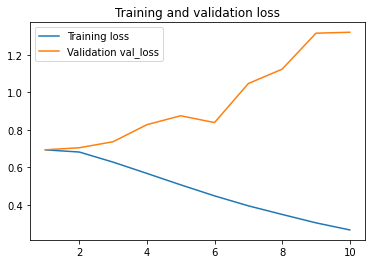

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 차트의 x축을 위한 epoch 정보 설정
epochs = range(1, len(acc) + 1)

# loss 정보 시각화
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation val_loss')
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# 테스트 데이터 셋을 통한 성능 측정
test_loss, test_acc = model.evaluate(x=input_test, y=y_test)

# GRU 모델 구조를 이용한 분류 분석

## step2. GRU 모델 디자인

In [16]:
# embedding layer : 32 차원, hidden layer: 32개, activation : tanh
gru_model = models.Sequential()
gru_model.add(layers.Embedding(input_dim=10000, output_dim=32))
# GRU default activation = tanh
gru_model.add(layers.GRU(units=32))
gru_model.add(layers.Dense(units=1, activation='sigmoid'))

In [17]:
gru_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [18]:
# loss binary_crossentropy / optimizer : rmsprop / metrics : accuracy
gru_model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

# batch size : 128, epochs : 10, validation data set perceptron : 20%
hisotry = gru_model.fit(x=input_train, y=y_test,
              batch_size=128,
              epochs=10,
              validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 80s 509ms/step - loss: 0.6935 - accuracy: 0.4969 - val_loss: 0.6936 - val_accuracy: 0.4992
Epoch 2/10
157/157 [==============================] - 81s 516ms/step - loss: 0.6861 - accuracy: 0.5598 - val_loss: 0.7016 - val_accuracy: 0.5016
Epoch 3/10
157/157 [==============================] - 82s 519ms/step - loss: 0.6560 - accuracy: 0.6162 - val_loss: 0.7399 - val_accuracy: 0.4870
Epoch 4/10
157/157 [==============================] - 83s 527ms/step - loss: 0.6127 - accuracy: 0.6630 - val_loss: 0.7622 - val_accuracy: 0.4898
Epoch 5/10
157/157 [==============================] - 82s 519ms/step - loss: 0.5715 - accuracy: 0.6985 - val_loss: 0.8341 - val_accuracy: 0.4970
Epoch 6/10
157/157 [==============================] - 81s 514ms/step - loss: 0.5351 - accuracy: 0.7254 - val_loss: 0.8512 - val_accuracy: 0.4972
Epoch 7/10
157/157 [==============================] - 81s 517ms/step - loss: 0.4960 - accuracy: 0.7556 - val_loss: 0.9003 - val_ac

In [22]:
# 학습 과정 시각화를 위한 정보 추출
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


In [23]:
epochs = range(1, len(acc) + 1)

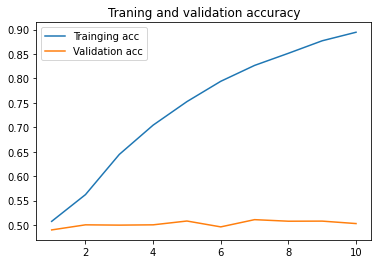

In [28]:
# 정합도 정보 시각화
plt.plot(epochs, acc, label="Trainging acc")
plt.plot(epochs, val_acc, label='Validation acc')
plt.title("Traning and validation accuracy")
plt.legend()
plt.show()

In [29]:
# 테스트 데이터 셋을 통한 성능 측정
tet_loss, test_acc = gru_model.evaluate(x=input_test, y=y_test)

782/782 [==============================] - 42s 53ms/step - loss: 1.1296 - accuracy: 0.4936
